# Лабораторная работа №6. Линейная регрессия

Выполнил студент группы 12002209 Телятников Максим Евгеньевич

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [4]:
print("Описание набора данных:")
print(diabetes.DESCR)

print("\nНаименования признаков:")
print(diabetes.feature_names)

Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [5]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Первые 5 строк набора данных:")
print(df.head())

Первые 5 строк набора данных:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [6]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Информация о типах данных:")
print(df.info())

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("\nКатегориальные признаки:", categorical_columns)

print("\nКоличество пропущенных значений (null) в каждом столбце:")
print(df.isnull().sum())

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Категориальные признаки: Index([], dtype='object')

Количество пропущенных значений (null) в каждом столбце:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


## Исследование данных

4. Постройте матрицу корреляции.

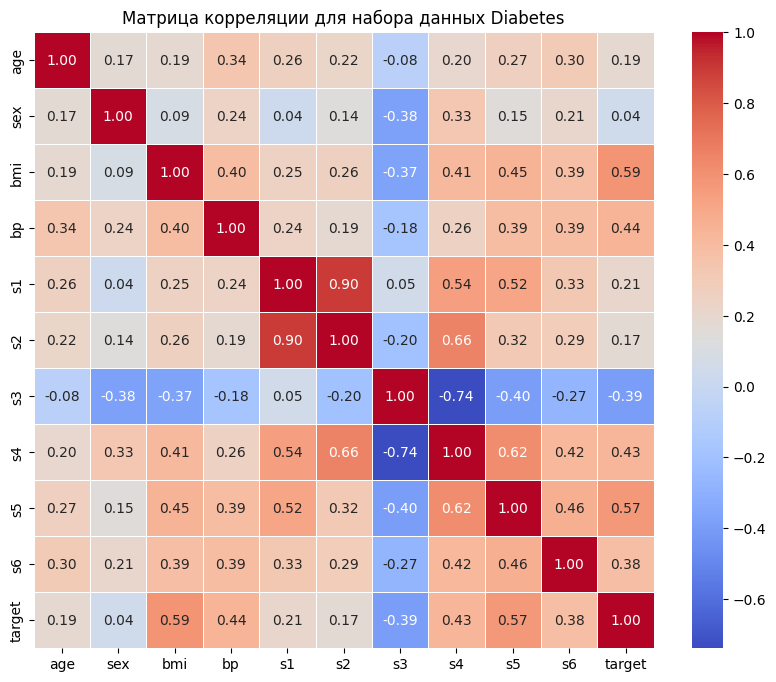

In [8]:
import seaborn as sns
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Матрица корреляции для набора данных Diabetes')
plt.show()

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

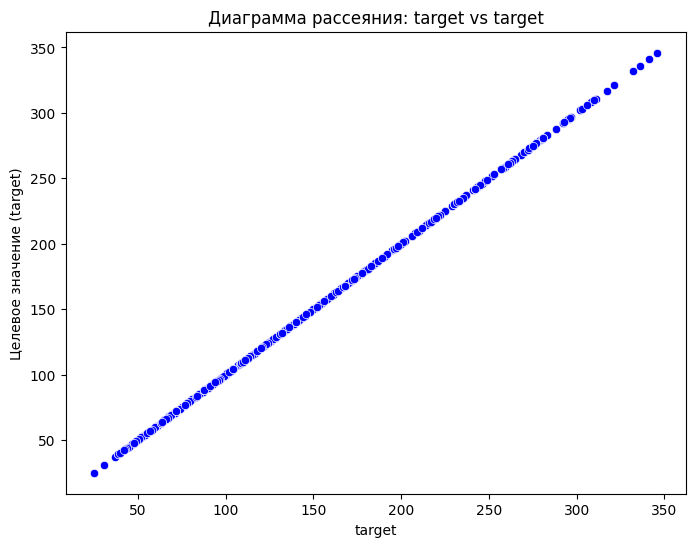

In [9]:
import seaborn as sns

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

most_correlated_feature = correlation_matrix['target'].abs().idxmax()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[most_correlated_feature], y=df['target'], color='blue')

plt.xlabel(most_correlated_feature)
plt.ylabel('Целевое значение (target)')
plt.title(f'Диаграмма рассеяния: {most_correlated_feature} vs target')

plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [10]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

top_5_features = correlation_matrix['target'].abs().sort_values(ascending=False).index[1:6]

X = df[top_5_features]
y = df['target']

print("Признаки с наибольшей корреляцией с целевым значением:")
print(top_5_features)
print("\nНабор признаков (X):")
print(X.head())
print("\nЦелевое значение (y):")
print(y.head())

Признаки с наибольшей корреляцией с целевым значением:
Index(['bmi', 's5', 'bp', 's4', 's3'], dtype='object')

Набор признаков (X):
        bmi        s5        bp        s4        s3
0  0.061696  0.019907  0.021872 -0.002592 -0.043401
1 -0.051474 -0.068332 -0.026328 -0.039493  0.074412
2  0.044451  0.002861 -0.005670 -0.002592 -0.032356
3 -0.011595  0.022688 -0.036656  0.034309 -0.036038
4 -0.036385 -0.031988  0.021872 -0.002592  0.008142

Целевое значение (y):
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [11]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

top_5_features = correlation_matrix['target'].abs().sort_values(ascending=False).index[1:6]

X = df[top_5_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Размер обучающего набора (X_train):", X_train.shape)
print("Размер тестового набора (X_test):", X_test.shape)
print("Размер обучающего набора (y_train):", y_train.shape)
print("Размер тестового набора (y_test):", y_test.shape)


Размер обучающего набора (X_train): (331, 5)
Размер тестового набора (X_test): (111, 5)
Размер обучающего набора (y_train): (331,)
Размер тестового набора (y_test): (111,)


8. Выполните обучение модели.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

top_5_features = correlation_matrix['target'].abs().sort_values(ascending=False).index[1:6]

X = df[top_5_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратичная ошибка (MSE):", mse)
print("Корень из среднеквадратичной ошибки (RMSE):", rmse)
print("Коэффициент детерминации (R²):", r2)

Среднеквадратичная ошибка (MSE): 2892.7786193830393
Корень из среднеквадратичной ошибки (RMSE): 53.784557443405994
Коэффициент детерминации (R²): 0.4768642138880054


## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

Решение в задании 8.

10. Расчитайте R² (коэффициент детерминации)

Решение в задании 8.

## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?

Основные типы машинного обучения:

- Обучение с учителем (Supervised Learning):

  - Модель обучается на данных с метками (например, классификация или регрессия).

- Обучение без учителя (Unsupervised Learning):

  - Модель обучается на данных без меток (например, кластеризация или снижение размерности).

- Обучение с подкреплением (Reinforcement Learning):

  - Модель обучается через взаимодействие со средой, получая награды за правильные действия.

2. Чем отличается обучение с учителем и без учителя?
Обучение с учителем:

- Используются данные с метками (например, классификация изображений или прогнозирование цен).

- Цель — предсказать метку для новых данных.

Обучение без учителя:

- Используются данные без меток (например, группировка клиентов по поведению).

- Цель — найти структуру или закономерности в данных.

3. Чем пакетное обучение отличается от динамического?

Пакетное обучение (Batch Learning):

- Модель обучается на всем наборе данных за один раз.

- Подходит для статических данных.

Динамическое обучение (Online Learning):

- Модель обучается постепенно, на каждом новом примере данных.

- Подходит для потоковых данных или данных, которые меняются со временем.

4. Чем обучение на основе образцов отличается от обучения на основе модели?

Обучение на основе образцов (Instance-Based Learning):

- Модель запоминает обучающие данные и делает предсказания на основе их сходства с новыми данными (например, метод k-ближайших соседей).

Обучение на основе модели (Model-Based Learning):

- Модель строит математическую модель данных (например, линейная регрессия или нейронные сети).

5. Что такое линейная регрессия?
                            
Линейная регрессия — это метод машинного обучения, который моделирует зависимость между независимыми переменными (признаками) и зависимой переменной (целевым значением) с помощью линейной функции.

Формула:
image.png

- y — целевое значение.
- x1,x2,...,xn — признаки.
- w1,w2,...,wn — веса.
- смещение (bias).
6. Что такое градиентный спуск?

Градиентный спуск — это алгоритм оптимизации, используемый для минимизации функции потерь.

Идея:

- На каждом шаге вычисляется градиент функции потерь (вектор частных производных).

- Параметры модели обновляются в направлении, противоположном градиенту.

Цель — найти минимум функции потерь.

7. Как правильно обрабатывать категориальные признаки?

Кодирование:

- One-Hot Encoding: Каждая категория преобразуется в бинарный вектор (например, [0, 1, 0]).

- Label Encoding: Категории преобразуются в числовые значения (например, 0, 1, 2).

Обработка редких категорий:

- Объединение редких категорий в одну группу.

Целевое кодирование (Target Encoding):

- Замена категорий средним значением целевой переменной для каждой категории.

8. Что такое матрица корреляции?

Матрица корреляции — это таблица, которая показывает корреляцию (степень линейной зависимости) между всеми парами признаков в наборе данных.

Значения корреляции варьируются от -1 до 1:

- 1 — сильная положительная корреляция.

- -1 — сильная отрицательная корреляция.

- 0 — отсутствие корреляции.
9. Что показывает метрика RMSE?

RMSE (Root Mean Squared Error) — это среднеквадратичная ошибка, которая показывает среднее отклонение предсказанных значений от реальных.

Формула:
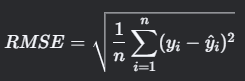

- yi — реальное значение.
- y^i — предсказанное значение.
- n — количество наблюдений.
Чем меньше RMSE, тем лучше модель.
10. Что показывает метрика R²?
R² (Коэффициент детерминации) — это метрика, которая показывает, насколько хорошо модель объясняет дисперсию целевой переменной.

Диапазон значений: от 0 до 1.

- 1 — модель идеально объясняет данные.

- 0 — модель не объясняет данные.

- Отрицательные значения — модель работает хуже, чем простое среднее значение.

Формула:
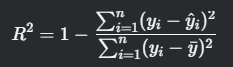

yˉ — среднее значение целевой переменной